In [1]:
import pandas as pd
trnx=pd.read_csv('Retail_Data_Transactions.csv')
trnx

customer_id trans_date  tran_amount
0           CS5295  11-Feb-13           35
1           CS4768  15-Mar-15           39
2           CS2122  26-Feb-13           52
3           CS1217  16-Nov-11           99
4           CS1850  20-Nov-13           78
...            ...        ...          ...
124995      CS8433  26-Jun-11           64
124996      CS7232  19-Aug-14           38
124997      CS8731  28-Nov-14           42
124998      CS8133  14-Dec-13           13
124999      CS7996  13-Dec-14           36

[125000 rows x 3 columns]

In [2]:
response=pd.read_csv('Retail_Data_Response.csv')
response

customer_id  response
0         CS1112         0
1         CS1113         0
2         CS1114         1
3         CS1115         1
4         CS1116         1
...          ...       ...
6879      CS8996         0
6880      CS8997         0
6881      CS8998         0
6882      CS8999         0
6883      CS9000         0

[6884 rows x 2 columns]

In [3]:
df=trnx.merge(response,on='customer_id',how='left')
df

customer_id trans_date  tran_amount  response
0           CS5295  11-Feb-13           35       1.0
1           CS4768  15-Mar-15           39       1.0
2           CS2122  26-Feb-13           52       0.0
3           CS1217  16-Nov-11           99       0.0
4           CS1850  20-Nov-13           78       0.0
...            ...        ...          ...       ...
124995      CS8433  26-Jun-11           64       0.0
124996      CS7232  19-Aug-14           38       0.0
124997      CS8731  28-Nov-14           42       0.0
124998      CS8133  14-Dec-13           13       0.0
124999      CS7996  13-Dec-14           36       0.0

[125000 rows x 4 columns]

In [4]:
# features
df.dtypes
df.shape
df.head()
df.tail()

customer_id trans_date  tran_amount  response
124995      CS8433  26-Jun-11           64       0.0
124996      CS7232  19-Aug-14           38       0.0
124997      CS8731  28-Nov-14           42       0.0
124998      CS8133  14-Dec-13           13       0.0
124999      CS7996  13-Dec-14           36       0.0

In [5]:
df.describe()

tran_amount       response
count  125000.000000  124969.000000
mean       64.991912       0.110763
std        22.860006       0.313840
min        10.000000       0.000000
25%        47.000000       0.000000
50%        65.000000       0.000000
75%        83.000000       0.000000
max       105.000000       1.000000

In [6]:
# MISSING VALUES
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [7]:
df=df.dropna()
df

customer_id trans_date  tran_amount  response
0           CS5295  11-Feb-13           35       1.0
1           CS4768  15-Mar-15           39       1.0
2           CS2122  26-Feb-13           52       0.0
3           CS1217  16-Nov-11           99       0.0
4           CS1850  20-Nov-13           78       0.0
...            ...        ...          ...       ...
124995      CS8433  26-Jun-11           64       0.0
124996      CS7232  19-Aug-14           38       0.0
124997      CS8731  28-Nov-14           42       0.0
124998      CS8133  14-Dec-13           13       0.0
124999      CS7996  13-Dec-14           36       0.0

[124969 rows x 4 columns]

In [8]:
df['trans_date']=pd.to_datetime(df['trans_date'])
df['response']=df['response'].astype('int64')
df

<ipython-input-8-dc3b0c85eddc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']=pd.to_datetime(df['trans_date'])
<ipython-input-8-dc3b0c85eddc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']=pd.to_datetime(df['trans_date'])
<ipython-input-8-dc3b0c85eddc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']=df['response'].as

customer_id trans_date  tran_amount  response
0           CS5295 2013-02-11           35         1
1           CS4768 2015-03-15           39         1
2           CS2122 2013-02-26           52         0
3           CS1217 2011-11-16           99         0
4           CS1850 2013-11-20           78         0
...            ...        ...          ...       ...
124995      CS8433 2011-06-26           64         0
124996      CS7232 2014-08-19           38         0
124997      CS8731 2014-11-28           42         0
124998      CS8133 2013-12-14           13         0
124999      CS7996 2014-12-13           36         0

[124969 rows x 4 columns]

In [9]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [10]:
# identifying outliers
# z_score

from scipy import stats
import numpy as np

z_score=np.abs(stats.zscore(df['response']))

threshold = 3

outliers = z_score>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

In [11]:
# creating new column

df['month']=df['trans_date'].dt.month

df

<ipython-input-11-f66420d84b3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['trans_date'].dt.month


customer_id trans_date  tran_amount  response  month
0           CS5295 2013-02-11           35         1      2
1           CS4768 2015-03-15           39         1      3
2           CS2122 2013-02-26           52         0      2
3           CS1217 2011-11-16           99         0     11
4           CS1850 2013-11-20           78         0     11
...            ...        ...          ...       ...    ...
124995      CS8433 2011-06-26           64         0      6
124996      CS7232 2014-08-19           38         0      8
124997      CS8731 2014-11-28           42         0     11
124998      CS8133 2013-12-14           13         0     12
124999      CS7996 2014-12-13           36         0     12

[124969 rows x 5 columns]

In [12]:
# which 3 months had the highest transcation amount
monthly_sales=df.groupby('month')['tran_amount'].sum()

monthly_sales=monthly_sales.sort_values(ascending=False).reset_index().tail(3)

monthly_sales

month  tran_amount
9       3       636475
10      5       633162
11      4       515746

In [13]:
# customers having higest orders

highest_orders = df['customer_id'].value_counts().reset_index()
highest_orders

customer_id  count
0         CS4424     39
1         CS4320     38
2         CS3799     36
3         CS3013     35
4         CS1215     35
...          ...    ...
6879      CS8559      4
6880      CS7224      4
6881      CS7716      4
6882      CS8504      4
6883      CS7333      4

[6884 rows x 2 columns]

In [14]:
top_five=highest_orders.sort_values(by='count', ascending=False).head(5)
top_five

customer_id  count
0      CS4424     39
1      CS4320     38
2      CS3799     36
3      CS3013     35
4      CS1215     35

<Axes: xlabel='customer_id', ylabel='count'>

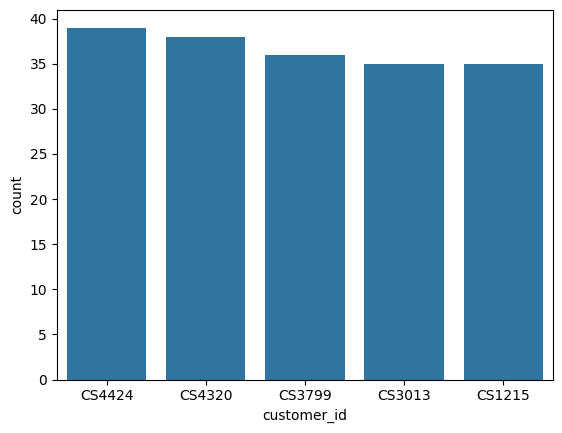

In [ ]:
sns.barplot(x='customer_id',y='count',data=top_five)

In [15]:
# customers having highest value of orders

customer_sales=df.groupby('customer_id')['tran_amount'].sum()

customer_sales=customer_sales.sort_values(ascending=False).reset_index().head(5)

customer_sales

customer_id  tran_amount
0      CS4424         2933
1      CS4320         2647
2      CS5752         2612
3      CS4660         2527
4      CS3799         2513

<Axes: xlabel='customer_id', ylabel='tran_amount'>

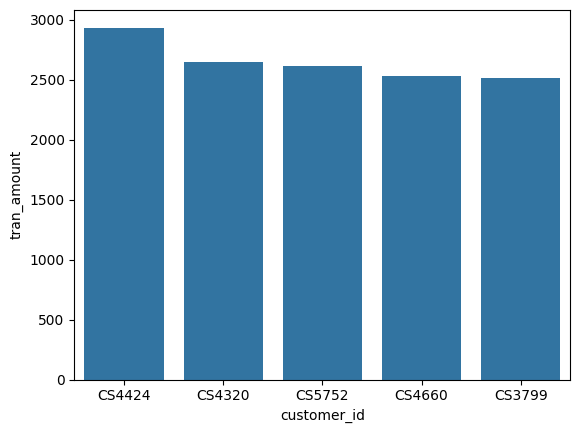

In [18]:
sns.barplot(x='customer_id', y='tran_amount', data=customer_sales)

In [19]:
#advanced analytics
#time series analysis

import matplotlib.dates as mdates
df['month_year']=df['trans_date'].dt.to_period('M')
df

<ipython-input-19-1e741ca73d33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


customer_id trans_date  tran_amount  response  month month_year
0           CS5295 2013-02-11           35         1      2    2013-02
1           CS4768 2015-03-15           39         1      3    2015-03
2           CS2122 2013-02-26           52         0      2    2013-02
3           CS1217 2011-11-16           99         0     11    2011-11
4           CS1850 2013-11-20           78         0     11    2013-11
...            ...        ...          ...       ...    ...        ...
124995      CS8433 2011-06-26           64         0      6    2011-06
124996      CS7232 2014-08-19           38         0      8    2014-08
124997      CS8731 2014-11-28           42         0     11    2014-11
124998      CS8133 2013-12-14           13         0     12    2013-12
124999      CS7996 2014-12-13           36         0     12    2014-12

[124969 rows x 6 columns]

<ipython-input-20-de3459f44c1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


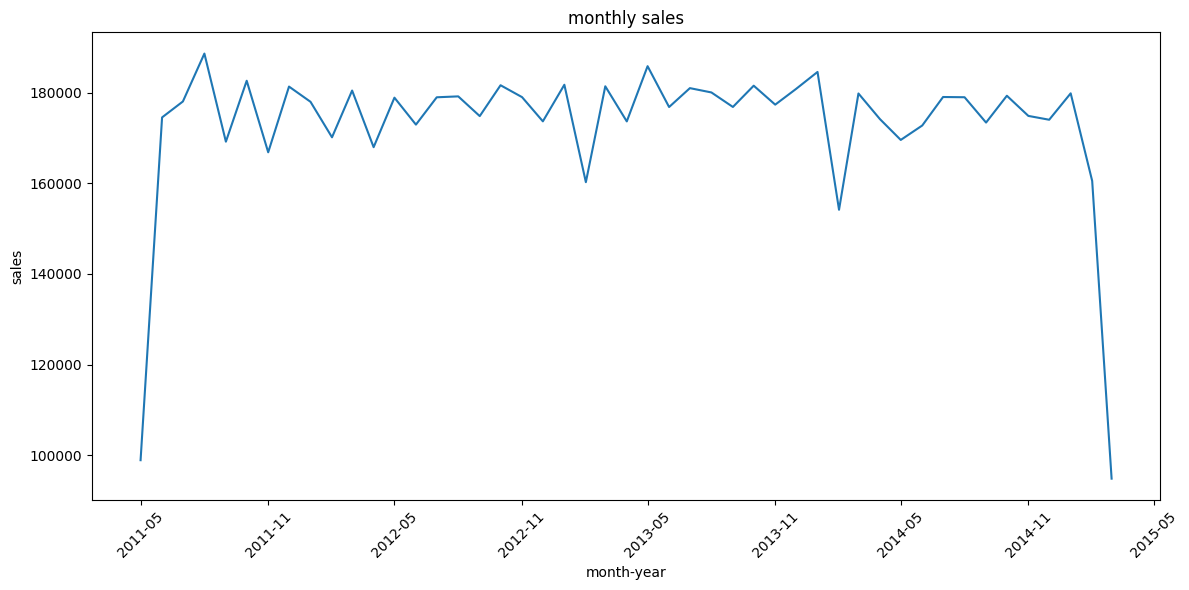

In [20]:
import matplotlib.dates as mdates
df['month_year']=df['trans_date'].dt.to_period('M')

monthly_sales = df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index=monthly_sales.index.to_timestamp()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('month-year')
plt.ylabel('sales')
plt.title('monthly sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# recency
recency = df.groupby('customer_id')['trans_date'].max()

# frequency
frequency = df.groupby('customer_id')['trans_date'].count()

# monetory
monetory = df.groupby('customer_id')['tran_amount'].sum()

# combine
rfm = pd.DataFrame({'recency':recency,'frequency':frequency,'monetory':monetory})

rfm

recency  frequency  monetory
customer_id                                
CS1112      2015-01-14         15      1012
CS1113      2015-02-09         20      1490
CS1114      2015-02-12         19      1432
CS1115      2015-03-05         22      1659
CS1116      2014-08-25         13       857
...                ...        ...       ...
CS8996      2014-12-09         13       582
CS8997      2014-06-28         14       543
CS8998      2014-12-22         13       624
CS8999      2014-07-02         12       383
CS9000      2015-02-28         13       533

[6884 rows x 3 columns]

In [22]:
def segment_customer(row):
  if row['recency'].year>=2012 and row['frequency']>=15 and row['monetory']>1000:
    return 'p0'
  elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetory']<=1000):
    return 'p1'
  else:
    return 'p2'

rfm['segment']=rfm.apply(segment_customer, axis=1)
rfm

recency  frequency  monetory segment
customer_id                                        
CS1112      2015-01-14         15      1012      p0
CS1113      2015-02-09         20      1490      p0
CS1114      2015-02-12         19      1432      p0
CS1115      2015-03-05         22      1659      p0
CS1116      2014-08-25         13       857      p2
...                ...        ...       ...     ...
CS8996      2014-12-09         13       582      p2
CS8997      2014-06-28         14       543      p2
CS8998      2014-12-22         13       624      p2
CS8999      2014-07-02         12       383      p2
CS9000      2015-02-28         13       533      p2

[6884 rows x 4 columns]

In [23]:
#churn analysis
churn_counts = df['response'].value_counts()
churn_counts.plot(kind='bar')

<Axes: xlabel='response'>

<Axes: xlabel='month_year'>

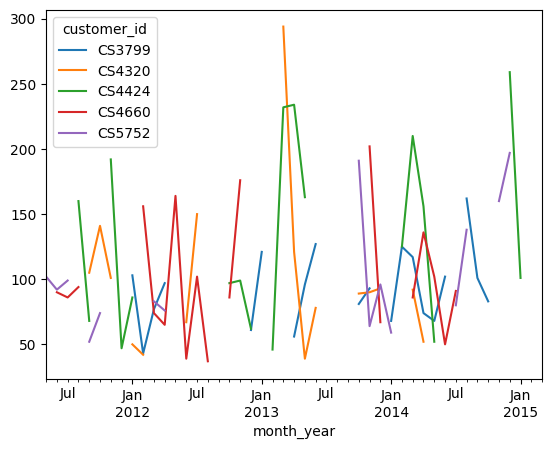

In [24]:
top_5_cus = monetory.sort_values(ascending=False).head(5).index

top_customers_df=df[df['customer_id'].isin(top_5_cus)]

top_cus_sales = top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)

top_cus_sales.plot(kind='line')

In [28]:
sns.barplot(x='month',y='tran_amount',data=df)

<Axes: xlabel='month', ylabel='tran_amount'>

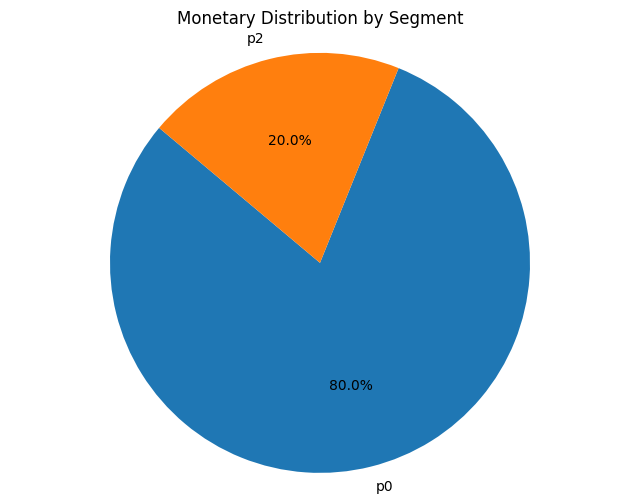

In [41]:
import matplotlib.pyplot as plt

# Grouping 'segment' and sum 'monetory'
segment_sum = rfm.groupby('segment')['monetory'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(segment_sum, labels=segment_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Monetary Distribution by Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



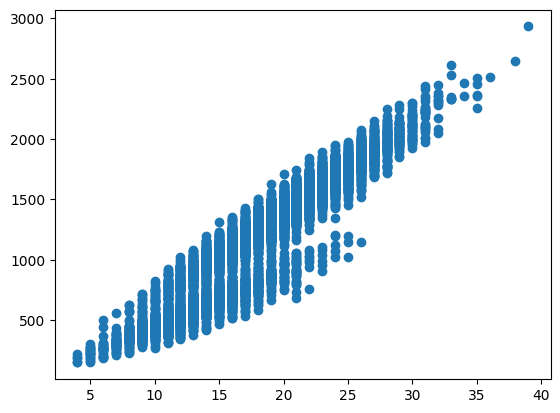

In [35]:
plt.scatter(x='frequency',y='monetory',data=rfm)
plt.show()

In [ ]:
df.to_csv('MainData.csv')


In [ ]:
rfm.to_csv('Additional_analysis.csv')